In [0]:
#1-a-----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras.layers
#--------------------------------


In [0]:
#1-b-----------------------------
df = pd.read_csv('Sunspots_dataset.csv')
#--------------------------------

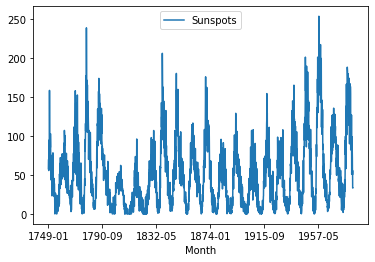

In [0]:
#1-c-----------------------------
df.plot(kind='line',x='Month',y='Sunspots')
plt.show()
#--------------------------------

In [0]:
#1-d-----------------------------
data = df.values[:,1]
#--------------------------------

In [0]:
#1-e-----------------------------
#(z-score) normalization
mean = data.mean(axis=0)
data -=mean
std = data.std(axis=0)
data /=std +10e-7
#---------------------------------

In [0]:
#-------------------data preparation---------------------------------------------------------------------
#takes dataset and defines every consecutive 50's values as input vs 51st value as corresponding target
def sample_gen(data):
  L = len(data) 
  N = L - 50 #number of samples
  samples = np.zeros((N,50)) #samples placeholder
  targets = np.zeros(N) #targets placeholder
  i = 50
  while(i < L):
    samples[i-50] =data[i-50:i]
    targets[i-50] = data[i]
    i+=1
  return samples,targets
#----------------------------------------------------------------------------------------------------------

#1-f&g---------------------------------------------
x_train,y_train = sample_gen(data[:1999])
x_val,y_val = sample_gen(data[2000:])
x_train = x_train.reshape(1949,50,1)
x_val =  x_val.reshape(770,50,1)
#------------------------------------------------


In [0]:
#------------------------------------------------------
#------------------PART2-------------------------------
#------------------------------------------------------

#---------------------------------------------------------
#--------------------Generals-----------------------------
from  keras.models import Sequential
from keras.layers import Dense,SimpleRNN,LSTM,GRU

#all models using same settings
def fit_model(model):
  opt = keras.optimizers.RMSprop()
  loss = keras.losses.MeanAbsoluteError()
  epochs = 50
  batch_size = 128
  model.compile(opt,loss,)
  history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))
  return history

#------------------------------------------------------------


#2-a--------------------------------------------
#----------using simpleRNN----------------------
#-----------------------------------------------
simple_model = Sequential()
simple_model.add(SimpleRNN(16,activation='elu'))
simple_model.add(Dense(1))
simple_history = fit_model(simple_model)
#----------------------------------------------

#2-b--------------------------------------------
#---------------using LSTM----------------------
#-----------------------------------------------

LSTM_model = Sequential()
LSTM_model.add(LSTM(16,activation='elu'))
LSTM_model.add(Dense(1))
LSTM_history = fit_model(LSTM_model)
#-----------------------------------------------

#2-c--------------------------------------------
#-------------------using GRU-------------------
#-----------------------------------------------

GRU_model = Sequential()
GRU_model.add(GRU(16,activation='elu'))
GRU_model.add(Dense(1))
GRU_history = fit_model(GRU_model)
#-----------------------------------------------


Train on 1949 samples, validate on 770 samples
Epoch 1/50
1949/1949 [==============================] - 0s 199us/step - loss: 0.4414 - val_loss: 0.5471
Epoch 2/50
1949/1949 [==============================] - 0s 93us/step - loss: 0.2999 - val_loss: 0.4213
Epoch 3/50
1949/1949 [==============================] - 0s 93us/step - loss: 0.2725 - val_loss: 0.3731
Epoch 4/50
1949/1949 [==============================] - 0s 93us/step - loss: 0.2629 - val_loss: 0.3408
Epoch 5/50
1949/1949 [==============================] - 0s 93us/step - loss: 0.2558 - val_loss: 0.3309
Epoch 6/50
1949/1949 [==============================] - 0s 95us/step - loss: 0.2519 - val_loss: 0.3215
Epoch 7/50
1949/1949 [==============================] - 0s 97us/step - loss: 0.2483 - val_loss: 0.3170
Epoch 8/50
1949/1949 [==============================] - 0s 94us/step - loss: 0.2468 - val_loss: 0.3225
Epoch 9/50
1949/1949 [==============================] - 0s 97us/step - loss: 0.2458 - val_loss: 0.3101
Epoch 10/50
1949/1949 [==

In [0]:

#------------------------------------------------------
#------------------PART3-------------------------------
#------------------------------------------------------
from keras.layers import Flatten

#3-a--------------------------------------------
#----------using simpleRNN----------------------
#-----------------------------------------------
simple_model_2 = Sequential()
simple_model_2.add(SimpleRNN(32,activation='elu',return_sequences=True))
simple_model_2.add(SimpleRNN(16,activation='elu',return_sequences=True))
simple_model_2.add(Flatten())
simple_model_2.add(Dense(1))
simple_history_2 = fit_model(simple_model_2)
#----------------------------------------------

#3-b--------------------------------------------
#---------------using LSTM----------------------
#-----------------------------------------------

LSTM_model_2 = Sequential()
LSTM_model_2.add(LSTM(32,activation='elu',return_sequences=True))
LSTM_model_2.add(LSTM(16,activation='elu',return_sequences=True))
LSTM_model_2.add(Flatten())
LSTM_model_2.add(Dense(1))
LSTM_history_2 = fit_model(LSTM_model_2)
#-----------------------------------------------

#3-c--------------------------------------------
#-------------------using GRU-------------------
#-----------------------------------------------

GRU_model_2 = Sequential()
GRU_model_2.add(GRU(32,activation='elu',return_sequences=True))
GRU_model_2.add(GRU(16,activation='elu',return_sequences=True))
GRU_model_2.add(Flatten())
GRU_model_2.add(Dense(1))
GRU_history_2 = fit_model(GRU_model_2)
#-----------------------------------------------

Train on 1949 samples, validate on 770 samples
Epoch 1/50
1949/1949 [==============================] - 1s 379us/step - loss: 0.4131 - val_loss: 0.4542
Epoch 2/50
1949/1949 [==============================] - 0s 207us/step - loss: 0.3054 - val_loss: 0.3953
Epoch 3/50
1949/1949 [==============================] - 0s 208us/step - loss: 0.2834 - val_loss: 0.3649
Epoch 4/50
1949/1949 [==============================] - 0s 213us/step - loss: 0.2805 - val_loss: 0.4478
Epoch 5/50
1949/1949 [==============================] - 0s 197us/step - loss: 0.2701 - val_loss: 0.4088
Epoch 6/50
1949/1949 [==============================] - 0s 201us/step - loss: 0.2647 - val_loss: 0.3672
Epoch 7/50
1949/1949 [==============================] - 0s 206us/step - loss: 0.2648 - val_loss: 0.3897
Epoch 8/50
1949/1949 [==============================] - 0s 204us/step - loss: 0.2552 - val_loss: 0.3788
Epoch 9/50
1949/1949 [==============================] - 0s 209us/step - loss: 0.2553 - val_loss: 0.3891
Epoch 10/50
1949/

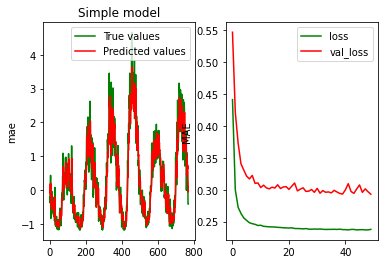

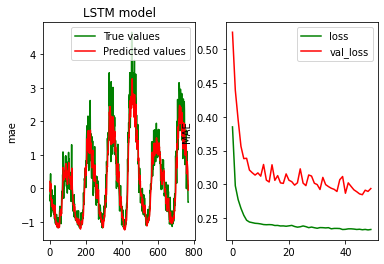

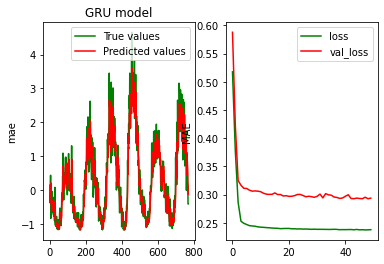

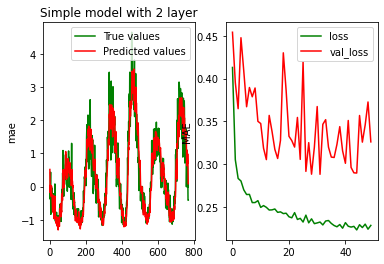

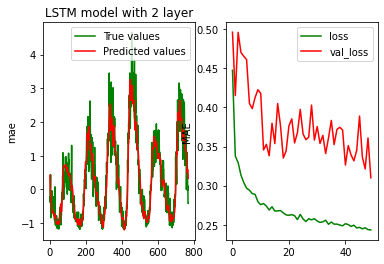

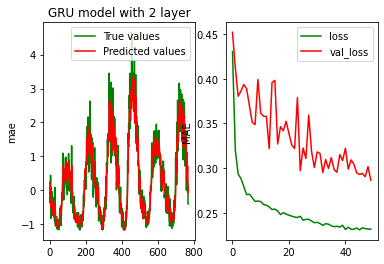

In [0]:
#-----------------------------------------------
#---------data Visualization--------------------
#-----------------------------------------------

#plots true values vs predicted values---------------
def visualize_data(model,history,tit):
  pred = model.predict(x_val)
  plt.figure()
  plt.subplot(1,2,1)
  plt.plot(y_val,'g')
  plt.plot(pred,'r')
  plt.ylabel('mae')
  plt.legend(['True values','Predicted values'])
  plt.title(tit)
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'],'g')
  plt.plot(history.history['val_loss'],'r')
  plt.legend(['loss','val_loss'])
  plt.ylabel('MAE')
  plt.show()
  
  
#--------------------------------------------------

visualize_data(simple_model,simple_history,'Simple model')
visualize_data(LSTM_model,LSTM_history,'LSTM model')
visualize_data(GRU_model,GRU_history,'GRU model')
visualize_data(simple_model_2,simple_history_2,'Simple model with 2 layer')
visualize_data(LSTM_model_2,LSTM_history_2,'LSTM model with 2 layer')
visualize_data(GRU_model_2,GRU_history_2,'GRU model with 2 layer')
#-----------------------------------------------------



In [0]:
simple_model.summary()

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_56 (SimpleRNN)    (None, 16)                288       
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 17        
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________
